## CIFAR-10 Image Classification with Keras FCN
This notebook implements a Fully Connected Neural Network (FCN) for classifying images from the CIFAR-10 dataset using Keras with TensorFlow backend.

## Dataset Overview

CIFAR-10 consists of 60,000 32x32 color images divided into 10 classes:

Airplane,
Automobile,
Bird,
Cat,
Deer,
Dog,
Frog,
Horse,
Ship,
Truck.

The dataset is split into 50,000 training images and 10,000 test images.

In [10]:
import os

from keras.datasets import cifar10
from keras.layers import Dense

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from keras import backend as K
print(K.backend())

tensorflow


### Model Structure:
- Input Layer: Accepts flattened 32×32×3 images (3072 dimensions)
- First Hidden Layer: 1002 neurons with ReLU activation
- Second Hidden Layer: 334 neurons with ReLU activation  
- Output Layer: 10 neurons with softmax activation (one per class)

Softmax activation in the output layer produces a probability distribution across the 10 possible classes.

In [12]:
inputs = keras.Input(shape=(3072,))
x = Dense(1002, activation='relu')(inputs)
y = Dense(334, activation='relu')(x)
outputs = Dense(10, activation='softmax')(y)

model = keras.Model(inputs=inputs, outputs=outputs, name='cifar10')

The summary provides important insights:
- Total number of parameters (3.4M), indicating model complexity
- Parameter distribution across layers (most parameters in the first dense layer)
- Output dimensionality reduction through the network (3072 → 1002 → 334 → 10)

In [13]:
model.summary()

Model: "cifar10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_3 (Dense)             (None, 1002)              3079146   
                                                                 
 dense_4 (Dense)             (None, 334)               335002    
                                                                 
 dense_5 (Dense)             (None, 10)                3350      
                                                                 
Total params: 3,417,498
Trainable params: 3,417,498
Non-trainable params: 0
_________________________________________________________________


### Data preparation steps:
1. **Loading the data**: 
   - Retrieves 50,000 training images and 10,000 test images with their labels
   - Images are originally 32×32 pixels with 3 color channels (RGB)

2. **Reshaping**: 
   - Flattens the 3D image arrays (32×32×3) into 1D vectors of length 3072
   - This format is required for input to fully connected neural networks

3. **Normalization**: 
   - Converts pixel values from integers (0-255) to floating point (0-1)
   - Scaling the data helps with:
     - Faster convergence during training
     - Prevention of numerical instability
     - More effective gradient descent

This preprocessing transforms raw image data into a format suitable for the FCN model while maintaining all the original information.

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(50000, 3072).astype("float32") / 255
x_test = x_test.reshape(10000, 3072).astype("float32") / 255

### Model Compilation

This code cell compiles the Keras model, configuring it for training. The `compile` method specifies the loss function, optimizer, and metrics to be used during the training process.

In [15]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

Here the neural network is trained

In [16]:
history = model.fit(x_train, y_train, batch_size=256, epochs=26, validation_split=0.25)

Epoch 1/26
147/147 [==============================] - 2s 12ms/step - loss: 2.0877 - accuracy: 0.2815 - val_loss: 1.8300 - val_accuracy: 0.3409
Epoch 2/26
147/147 [==============================] - 2s 11ms/step - loss: 1.7427 - accuracy: 0.3795 - val_loss: 1.7230 - val_accuracy: 0.3789
Epoch 3/26
147/147 [==============================] - 2s 11ms/step - loss: 1.6488 - accuracy: 0.4148 - val_loss: 1.6680 - val_accuracy: 0.4090
Epoch 4/26
147/147 [==============================] - 2s 11ms/step - loss: 1.6012 - accuracy: 0.4309 - val_loss: 1.5808 - val_accuracy: 0.4407
Epoch 5/26
147/147 [==============================] - 2s 11ms/step - loss: 1.5386 - accuracy: 0.4534 - val_loss: 1.5795 - val_accuracy: 0.4456
Epoch 6/26
147/147 [==============================] - 2s 11ms/step - loss: 1.5083 - accuracy: 0.4659 - val_loss: 1.5597 - val_accuracy: 0.4528
Epoch 7/26
147/147 [==============================] - 2s 12ms/step - loss: 1.4709 - accuracy: 0.4759 - val_loss: 1.5401 - val_accuracy: 0.4539

Displaying the training and validation loss curves generated during model training. This visualization allows for the assessment of model performance and identification of potential overfitting or underfitting.

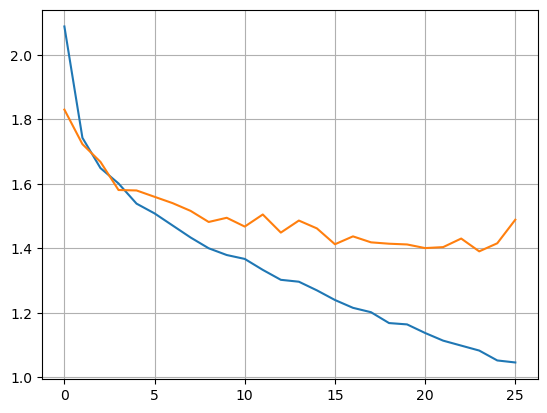

In [17]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.show()

Evaluating the trained model's performance on the test dataset and displaying the test loss and accuracy.

In [18]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 1.4624 - accuracy: 0.5080 - 560ms/epoch - 2ms/step
Test loss: 1.4623581171035767
Test accuracy: 0.5080000162124634


## Visualization of Model Predictions

The following code visualizes the model's predictions on randomly selected test images from the CIFAR-10 dataset:

### What this visualization shows:
- Randomly selects 15 test images from the CIFAR-10 dataset
- Displays each image with its true label and the model's prediction
- Color-codes the results: green for correct predictions, red for incorrect ones
- Arranged in a 3×5 grid for easy comparison

This visualization helps evaluate the model's performance qualitatively by showing:
1. Which classes the model predicts accurately
2. Common misclassification patterns
3. Visual characteristics of images that lead to correct/incorrect predictions

313/313 [==============================] - 1s 2ms/step


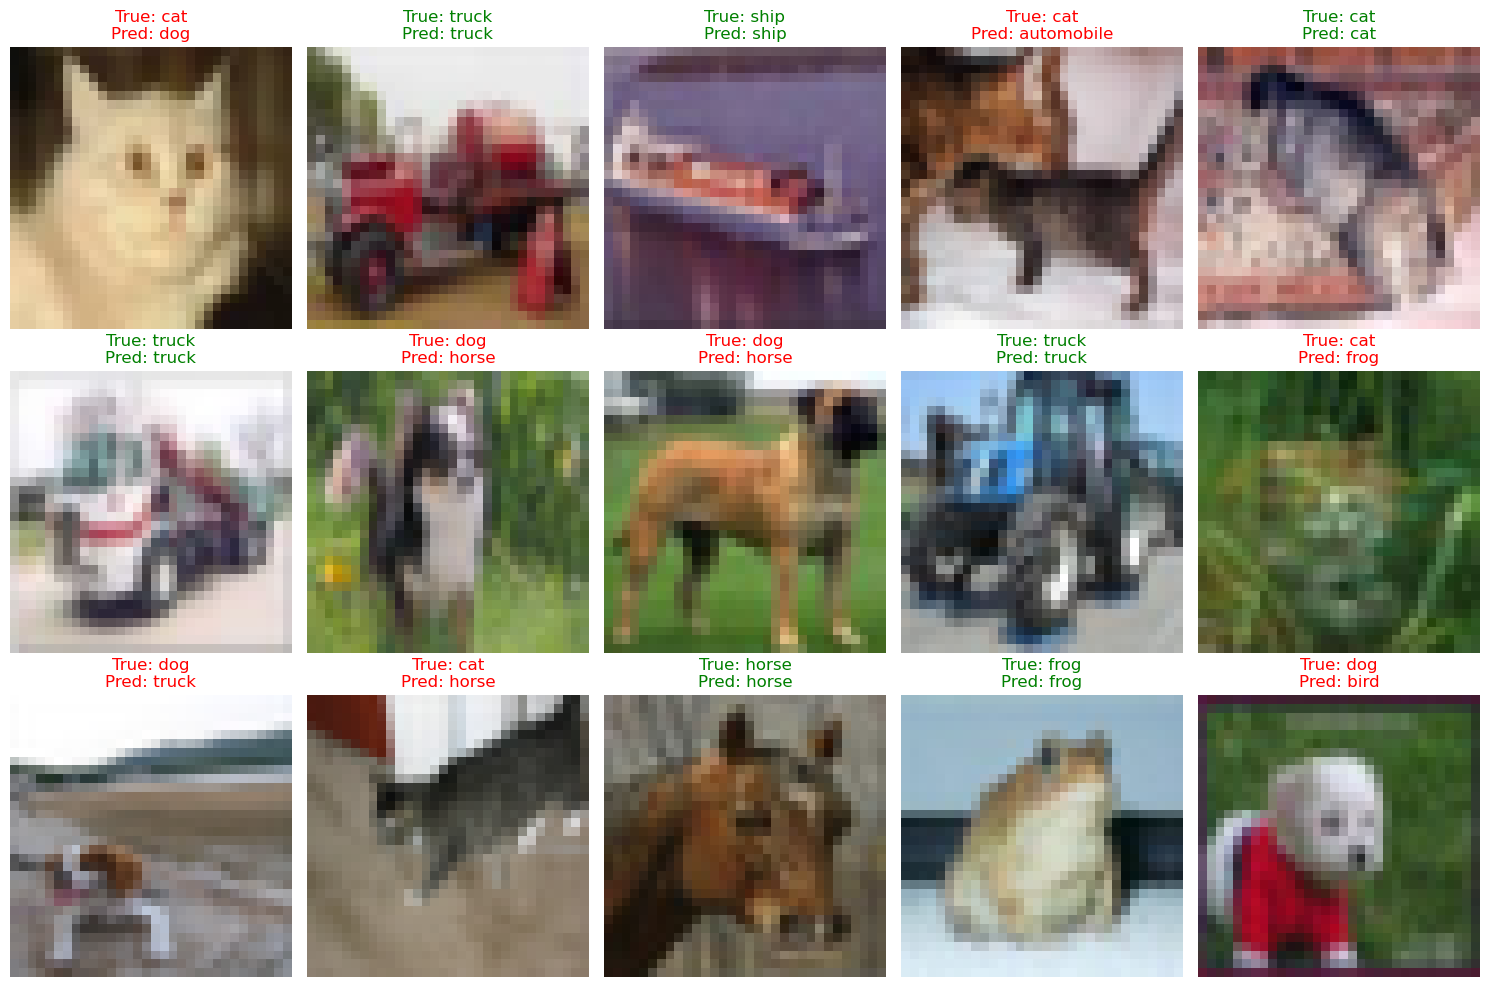

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

num_samples = 15
indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(15, 10))

for i, idx in enumerate(indices):
    img = x_test[idx].reshape(32, 32, 3)

    true_label = y_test[idx][0]
    pred_label = predicted_classes[idx]

    color = 'green' if true_label == pred_label else 'red'

    plt.subplot(3, 5, i+1)
    plt.imshow(img)
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}",
              color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()